In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv("hourly_volume.csv")
data1 = pd.read_csv("AirPassengers.csv")

In [3]:
data[data.columns[0]] = pd.to_datetime(data[data.columns[0]], infer_datetime_format=True)
data1[data1.columns[0]] = pd.to_datetime(data1[data1.columns[0]], infer_datetime_format=True)

In [4]:
data.head()

,order_hour,num_orders
0,2016-07-04 00:00:00,0
1,2016-07-04 01:00:00,0
2,2016-07-04 02:00:00,0
3,2016-07-04 03:00:00,0
4,2016-07-04 04:00:00,0


In [5]:
data1.head()

,Month,AirPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
a=data.iloc[:,0].head()
a

0   2016-07-04 00:00:00
1   2016-07-04 01:00:00
2   2016-07-04 02:00:00
3   2016-07-04 03:00:00
4   2016-07-04 04:00:00
Name: order_hour, dtype: datetime64[ns]

In [7]:
c=data.iloc[:,0][1]-data.iloc[:,0][0]
print(c)
print(type(c))
d=data1.iloc[:,0][4]-data1.iloc[:,0][3]
print(d)

e=pd.Timestamp(2017,1,1)
f=pd.Timestamp(2017,1,2)
g=f-e
print(g)

h=pd.Timestamp(2016,1,1)
i=pd.Timestamp(2017,1,1)
j=i-h
print(j)

0 days 01:00:00
<class 'pandas._libs.tslibs.timedeltas.Timedelta'>
30 days 00:00:00
1 days 00:00:00
366 days 00:00:00


In [8]:
#hourly difference
print(c == datetime.timedelta(minutes=60))
#daily difference
print(g == datetime.timedelta(minutes=60*24))
#monthly difference
print(d >= datetime.timedelta(minutes=60*24*28) and d <= datetime.timedelta(minutes=60*24*31))
#yearly difference
print(j >= datetime.timedelta(minutes=60*24*365) and j <= datetime.timedelta(minutes=60*24*366))

True
True
True
True


In [9]:
b=data['order_hour'].head()
b

0   2016-07-04 00:00:00
1   2016-07-04 01:00:00
2   2016-07-04 02:00:00
3   2016-07-04 03:00:00
4   2016-07-04 04:00:00
Name: order_hour, dtype: datetime64[ns]

In [10]:
a==b

0    True
1    True
2    True
3    True
4    True
Name: order_hour, dtype: bool

In [11]:
data.head()

,order_hour,num_orders
0,2016-07-04 00:00:00,0
1,2016-07-04 01:00:00,0
2,2016-07-04 02:00:00,0
3,2016-07-04 03:00:00,0
4,2016-07-04 04:00:00,0


In [12]:
data.columns[0]

'order_hour'

In [13]:
#assuming that the first column is the time in time series.
#set the time as index
data=data.set_index(data.columns[0])
data.head()

,num_orders
order_hour,
2016-07-04 00:00:00,0
2016-07-04 01:00:00,0
2016-07-04 02:00:00,0
2016-07-04 03:00:00,0
2016-07-04 04:00:00,0


In [14]:
#low, mid, high level of extensiveness of p,d,q search
#low is fast, but less accurate
#high is slow, but most accurate
#ex
intensity = 'low'
if intensity == 'low':
    p = d = q = range(0,2)
if intensity == 'mid':
    p = d = q = range(0,3)
if intensity == 'high':
    p = d = q = range(0,4)

In [15]:
pdq = list(itertools.product(p,d,q))

In [16]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [17]:
data.head()

,num_orders
order_hour,
2016-07-04 00:00:00,0
2016-07-04 01:00:00,0
2016-07-04 02:00:00,0
2016-07-04 03:00:00,0
2016-07-04 04:00:00,0


In [18]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [19]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [20]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

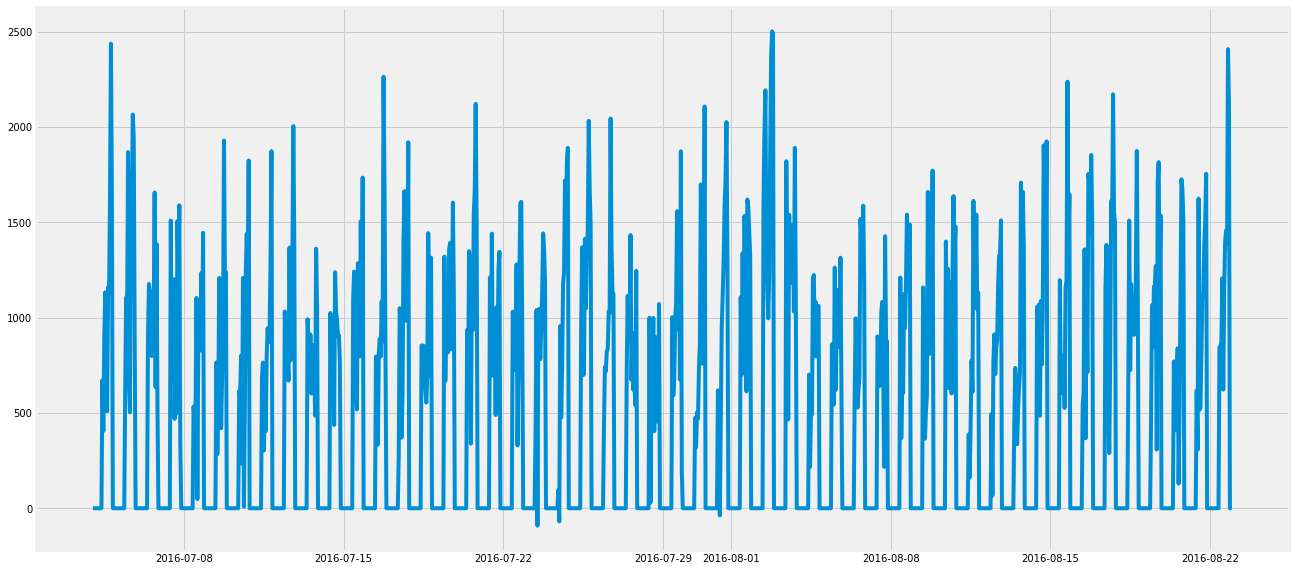

In [21]:
plt.figure(figsize=(20,10))
plt.plot(data)

In [22]:
#grid search - automation of finding parameters
aic = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            aic.append([param, param_seasonal, results.aic])
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:19337.944215074727
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:19155.977201549438
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:19960.894323156077
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:18310.531376605526
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:19172.468181033466
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:18678.64474756887
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:17050.254296274423
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:17034.87924085231
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:18654.885575913933
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:18475.574554918672
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:19190.72878420528
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:17743.772370740473
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:18503.92032019636
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:17941.546312903338
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:17040.810290603753
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:17009.909759060283
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:18164.919810853753
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:17993.310819943752
ARIMA(0, 1, 0)x(0, 1, 0, 12) - A

In [23]:
aic

[[(0, 0, 0), (0, 0, 0, 12), 19337.944215074727],
 [(0, 0, 0), (0, 0, 1, 12), 19155.977201549438],
 [(0, 0, 0), (0, 1, 0, 12), 19960.894323156077],
 [(0, 0, 0), (0, 1, 1, 12), 18310.531376605526],
 [(0, 0, 0), (1, 0, 0, 12), 19172.468181033466],
 [(0, 0, 0), (1, 0, 1, 12), 18678.64474756887],
 [(0, 0, 0), (1, 1, 0, 12), 17050.254296274423],
 [(0, 0, 0), (1, 1, 1, 12), 17034.87924085231],
 [(0, 0, 1), (0, 0, 0, 12), 18654.885575913933],
 [(0, 0, 1), (0, 0, 1, 12), 18475.574554918672],
 [(0, 0, 1), (0, 1, 0, 12), 19190.72878420528],
 [(0, 0, 1), (0, 1, 1, 12), 17743.772370740473],
 [(0, 0, 1), (1, 0, 0, 12), 18503.92032019636],
 [(0, 0, 1), (1, 0, 1, 12), 17941.546312903338],
 [(0, 0, 1), (1, 1, 0, 12), 17040.810290603753],
 [(0, 0, 1), (1, 1, 1, 12), 17009.909759060283],
 [(0, 1, 0), (0, 0, 0, 12), 18164.919810853753],
 [(0, 1, 0), (0, 0, 1, 12), 17993.310819943752],
 [(0, 1, 0), (0, 1, 0, 12), 18800.935187187722],
 [(0, 1, 0), (0, 1, 1, 12), 17523.974573244865],
 [(0, 1, 0), (1, 0, 0, 1

In [24]:
#finding the best parameters
gen = (x for x in aic)
from operator import itemgetter
p=min(gen, key=itemgetter(2))
p

[(1, 0, 1), (1, 1, 1, 12), 16986.286278432664]

In [25]:
#use the best (lowest AIC) parameters
#to fit the ARIMA time series model
mod = sm.tsa.statespace.SARIMAX(data,
                                order=p[0],
                                seasonal_order=p[1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7554      0.066     11.464      0.000       0.626       0.885
ma.L1         -0.6114      0.077     -7.935      0.000      -0.762      -0.460
ar.S.L12      -0.8791      0.014    -61.497      0.000      -0.907      -0.851
ma.S.L12      -0.3225      0.032     -9.973      0.000      -0.386      -0.259
sigma2      1.115e+05   3447.833     32.353      0.000    1.05e+05    1.18e+05


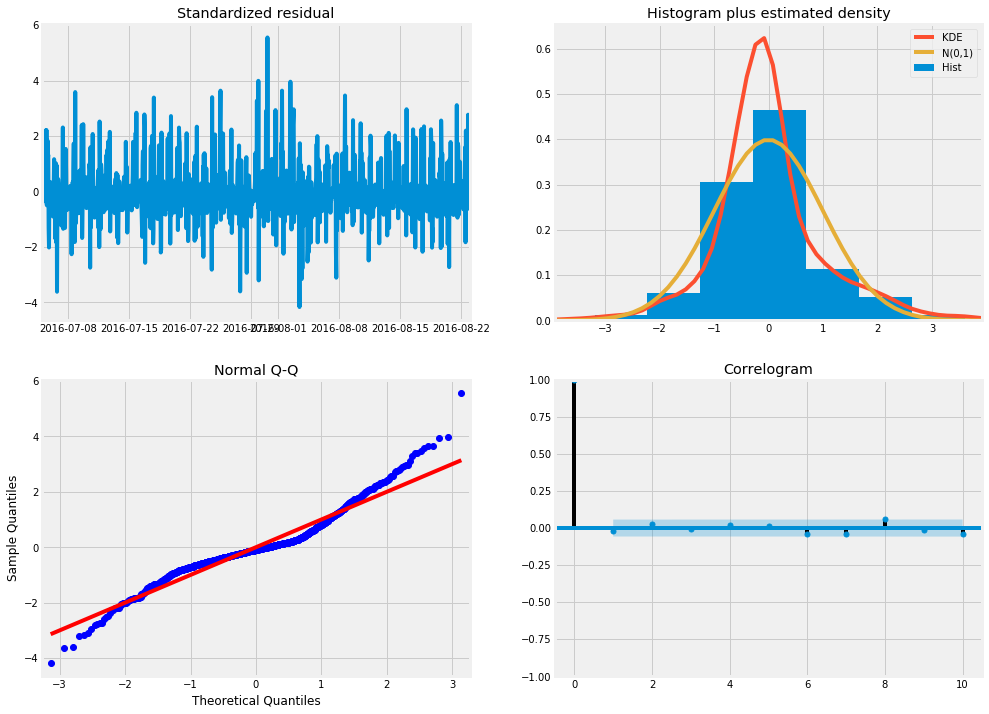

In [26]:
#run model diagnostics
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#predict
# Get forecast 500 steps (hours in this case) ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [28]:
pred_uc.predicted_mean

2016-08-23 00:00:00     328.864559
2016-08-23 01:00:00     -42.244629
2016-08-23 02:00:00      72.483914
2016-08-23 03:00:00       8.139296
2016-08-23 04:00:00      39.143746
2016-08-23 05:00:00      57.041388
2016-08-23 06:00:00     147.241986
2016-08-23 07:00:00     -31.731633
2016-08-23 08:00:00      85.318025
2016-08-23 09:00:00       4.560978
2016-08-23 10:00:00     748.529124
2016-08-23 11:00:00     726.135395
2016-08-23 12:00:00     787.311034
2016-08-23 13:00:00    1042.737779
2016-08-23 14:00:00     546.221637
2016-08-23 15:00:00    1010.191955
2016-08-23 16:00:00    1231.056850
2016-08-23 17:00:00    1282.878992
2016-08-23 18:00:00    1234.107866
2016-08-23 19:00:00    2110.817409
2016-08-23 20:00:00    1871.458135
2016-08-23 21:00:00      -0.762281
2016-08-23 22:00:00      89.479471
2016-08-23 23:00:00      87.015552
2016-08-24 00:00:00     383.708978
2016-08-24 01:00:00      88.465155
2016-08-24 02:00:00     129.419636
2016-08-24 03:00:00     129.009337
2016-08-24 04:00:00 

In [46]:
#function
#data_file should have only 2 columns. [time, number]
def forecast_arima(data_file, intensity, time_forward):
    data = pd.read_csv(data_file)
    #if missing value
    data = data.dropna()
    #parse strings to datetime type
    data[data.columns[0]] = pd.to_datetime(data[data.columns[0]], infer_datetime_format=True)
    
    """
    #For time Later:
    # check if the input of the timeline is by hour, day, week, year, etc.
    i=data[data.columns[0]][1]-data[data.columns[0]][0]
    #double makesure
    j=data[data.columns[0]][2]-data[data.columns[0]][1]
    if (i == datetime.timedelta(minutes=60) and j == datetime.timedelta(minutes=60)):
        t = 1 #'hour'
    if (i == datetime.timedelta(minutes=60*24) and j == datetime.timedelta(minutes=60*24)):
        t = 24 #'day'
    if ((i >= datetime.timedelta(minutes=60*24*28) and i <= datetime.timedelta(minutes=60*24*31))
        and (j >= datetime.timedelta(minutes=60*24*28) and j <= datetime.timedelta(minutes=60*24*31))):
        t = 24*30 #'monthly' average
    if ((i >= datetime.timedelta(minutes=60*24*365) and i <= datetime.timedelta(minutes=60*24*366))
       and (j >= datetime.timedelta(minutes=60*24*365) and j <= datetime.timedelta(minutes=60*24*366))):
        t = 8760 # yearly hours
    """
    
    data = data.set_index(data.columns[0])
    if intensity == 1:
        p = d = q = range(0,2)
    if intensity == 2:
        p = d = q = range(0,3)
    if intensity == 3:
        p = d = q = range(0,4)
    pdq = list(itertools.product(p,d,q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    #grid search - automation of finding parameters
    aic = []
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(data,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                #print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                aic.append([param, param_seasonal, results.aic])
            except:
                continue
    #finding the best parameters
    gen = (x for x in aic)
    from operator import itemgetter
    p=min(gen, key=itemgetter(2))
    #use the best (lowest AIC) parameters
    #to fit the ARIMA time series model
    mod = sm.tsa.statespace.SARIMAX(data,order=p[0],seasonal_order=p[1],enforce_stationarity=False,enforce_invertibility=False)

    results = mod.fit()
    
    # get forecast 500 steps ahead in future    
    no_steps = time_forward
    pred_uc = results.get_forecast(steps=no_steps)
    
    # Get confidence intervals of forecasts
    pred_ci = pred_uc.conf_int()
    ax = data.plot(label='observed', figsize=(20, 15))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    plt.legend()
    plt.show()
    
    print(pred_uc.predicted_mean)

100


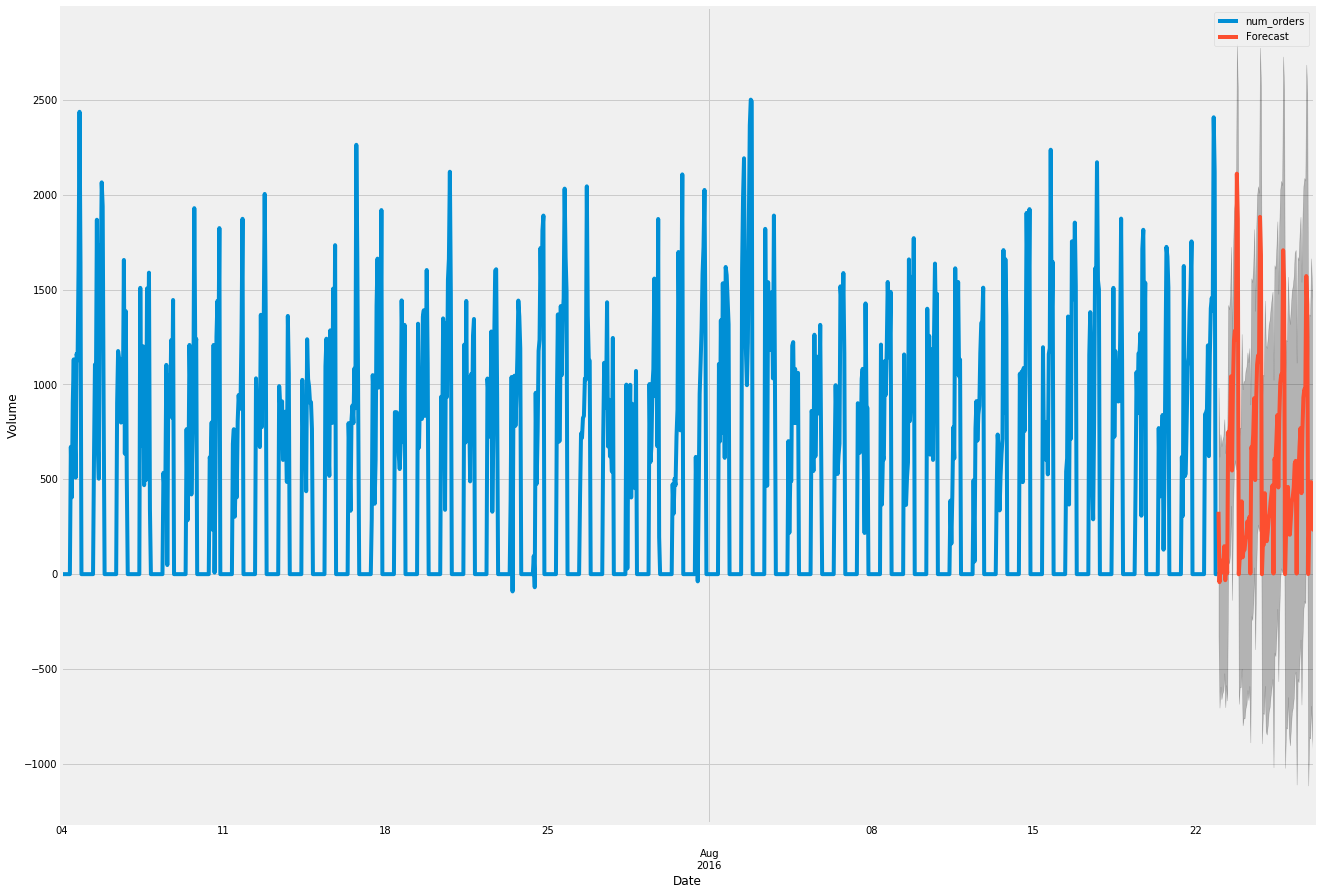

2016-08-23 00:00:00     328.864559
2016-08-23 01:00:00     -42.244629
2016-08-23 02:00:00      72.483914
2016-08-23 03:00:00       8.139296
2016-08-23 04:00:00      39.143746
2016-08-23 05:00:00      57.041388
2016-08-23 06:00:00     147.241986
2016-08-23 07:00:00     -31.731633
2016-08-23 08:00:00      85.318025
2016-08-23 09:00:00       4.560978
2016-08-23 10:00:00     748.529124
2016-08-23 11:00:00     726.135395
2016-08-23 12:00:00     787.311034
2016-08-23 13:00:00    1042.737779
2016-08-23 14:00:00     546.221637
2016-08-23 15:00:00    1010.191955
2016-08-23 16:00:00    1231.056850
2016-08-23 17:00:00    1282.878992
2016-08-23 18:00:00    1234.107866
2016-08-23 19:00:00    2110.817409
2016-08-23 20:00:00    1871.458135
2016-08-23 21:00:00      -0.762281
2016-08-23 22:00:00      89.479471
2016-08-23 23:00:00      87.015552
2016-08-24 00:00:00     383.708978
2016-08-24 01:00:00      88.465155
2016-08-24 02:00:00     129.419636
2016-08-24 03:00:00     129.009337
2016-08-24 04:00:00 

In [44]:
#first arg = dataset (first column = time)
#second arg = intensity (1=low, 2=mid, 3=high)
#third arg = how many time-frame forward - AutoDetect which TimeFrame frequency dataset contains.

#return
#1.diagram of original and predicted with confidence intervals
#2.predicted values as table
forecast_arima("hourly_volume.csv", 1, 100) #for next 100 hours

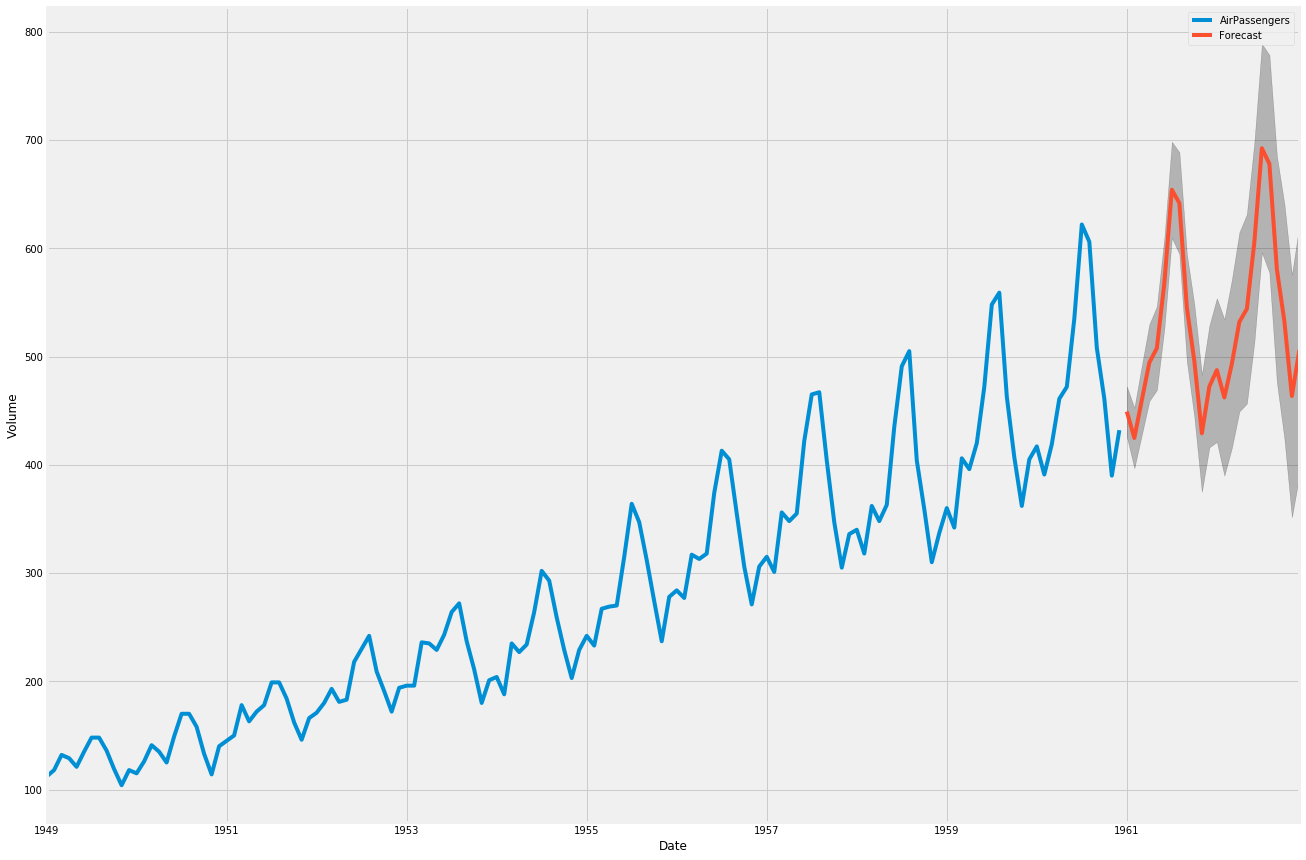

1961-01-01    449.157744
1961-02-01    424.762346
1961-03-01    459.862789
1961-04-01    494.368081
1961-05-01    507.683575
1961-06-01    567.716727
1961-07-01    654.049157
1961-08-01    641.724155
1961-09-01    545.225867
1961-10-01    495.824265
1961-11-01    429.094696
1961-12-01    472.343578
1962-01-01    487.473131
1962-02-01    462.179701
1962-03-01    493.306308
1962-04-01    532.006090
1962-05-01    544.025694
1962-06-01    605.719273
1962-07-01    692.425316
1962-08-01    678.043563
1962-09-01    580.704827
1962-10-01    532.647306
1962-11-01    463.527746
1962-12-01    506.077679
Freq: MS, dtype: float64


In [47]:
#different datasets
#1. AirPassengers dataset:curl -O https://assets.digitalocean.com/articles/eng_python/prophet/AirPassengers.csv
forecast_arima("AirPassengers.csv", 1, 24) #for next 24 months (2 years)